# 911 Calls Analysis and Visualization

# By Lamine Diakite 

# 10/24/19

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.tail(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1
423908,40.155164,-75.264665,HOFFMAN ; LOWER GWYNEDD; 2018-11-16 @ 08:46:25;,19422.0,Traffic: DISABLED VEHICLE -,2018-11-16 08:46:25,LOWER GWYNEDD,HOFFMAN,1


# Shows the size of the data and name of variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


# Extract the date and time from variable Timestamp

In [6]:

df['Date']= df['timeStamp'].apply(lambda timeStamp:timeStamp.split(' ')[0])
df['Time']= df['timeStamp'].apply(lambda timeStamp:timeStamp.split(' ')[1])
#Create a data frame using date, zip code, township and e as Count
df2= pd.DataFrame({'Date':df['Date'],'Time':df['Time'],'Zipcode':df['zip'], 'Township':df['twp'], 'Count':df['e']})
df2.head(3)

,Date,Time,Zipcode,Township,Count
0,2015-12-10,17:10:52,19525.0,NEW HANOVER,1
1,2015-12-10,17:29:21,19446.0,HATFIELD TOWNSHIP,1
2,2015-12-10,14:39:21,19401.0,NORRISTOWN,1


# Functions to get year, month, and day from Date; ALso transform zipcode into an integer from float value

In [7]:

def getYear(value):
    return str(value)[:4]
def getMonth(value):
    return str(value)[5:7]
def getDay(value):
    return str(value)[8:10]

# Get zip code from the float value zip
def getZipcode(value):
    value= str(value)
    value =value.split('.')[0]
    if value == 'nan':
        return int(0)
    else:
        return int(value)


# Adding new columns to the dataframe df2: Call_year, Call_month, Call_day, Zip_code

In [8]:
df2['Call_year']= df2['Date'].apply(getYear)
df2['Call_month']= df2['Date'].apply(getMonth)
df2['Call_day']= df2['Date'].apply(getDay)
df2['Zip_code']= df2['Zipcode'].apply(getZipcode)
df2.head(5)

,Date,Time,Zipcode,Township,Count,Call_year,Call_month,Call_day,Zip_code
0,2015-12-10,17:10:52,19525.0,NEW HANOVER,1,2015,12,10,19525
1,2015-12-10,17:29:21,19446.0,HATFIELD TOWNSHIP,1,2015,12,10,19446
2,2015-12-10,14:39:21,19401.0,NORRISTOWN,1,2015,12,10,19401
3,2015-12-10,16:47:36,19401.0,NORRISTOWN,1,2015,12,10,19401
4,2015-12-10,16:56:52,NaN,LOWER POTTSGROVE,1,2015,12,10,0


# Convert dataframe variable Time to datatime and extract hour from Time then it to a new variable Hour

In [9]:
df2['Hour'] = pd.to_datetime(df2['Time'].astype(str)).dt.hour
df2.head(5)

,Date,Time,Zipcode,Township,Count,Call_year,Call_month,Call_day,Zip_code,Hour
0,2015-12-10,17:10:52,19525.0,NEW HANOVER,1,2015,12,10,19525,17
1,2015-12-10,17:29:21,19446.0,HATFIELD TOWNSHIP,1,2015,12,10,19446,17
2,2015-12-10,14:39:21,19401.0,NORRISTOWN,1,2015,12,10,19401,14
3,2015-12-10,16:47:36,19401.0,NORRISTOWN,1,2015,12,10,19401,16
4,2015-12-10,16:56:52,NaN,LOWER POTTSGROVE,1,2015,12,10,0,16


# 1) How many missing zip codes exist in the Zip_code column?

In [10]:
#df2[df2['Zip_code']==0].count()
sum(df2[df2['Zip_code']==0]['Count'].value_counts())

52129

# Overwrite df2 to ignore rows with missing data (0)

In [11]:
df2 =df2[df2['Zip_code'] != 0]
df2.sort_values('Zip_code')
df2.head(5)

,Date,Time,Zipcode,Township,Count,Call_year,Call_month,Call_day,Zip_code,Hour
0,2015-12-10,17:10:52,19525.0,NEW HANOVER,1,2015,12,10,19525,17
1,2015-12-10,17:29:21,19446.0,HATFIELD TOWNSHIP,1,2015,12,10,19446,17
2,2015-12-10,14:39:21,19401.0,NORRISTOWN,1,2015,12,10,19401,14
3,2015-12-10,16:47:36,19401.0,NORRISTOWN,1,2015,12,10,19401,16
5,2015-12-10,15:39:04,19446.0,LANSDALE,1,2015,12,10,19446,15


# 2) What area zip_code had the most call? 

In [12]:
df2['Zip_code'].value_counts().head()  #Top 5 zipcodes where the most 911 calls came from

19401    28656
19464    27948
19403    21631
19446    20496
19406    14097
Name: Zip_code, dtype: int64

# 3) Which townships called the most? 

In [13]:
df2['Township'].value_counts().head(5)   #Top 5 townships that made the most 911 calls

LOWER MERION    30995
ABINGTON        24696
NORRISTOWN      22749
POTTSTOWN       17130
CHELTENHAM      16926
Name: Township, dtype: int64

# 4) which townships called the least ?

In [14]:
df2['Township'].value_counts().tail(5)  #Top 5 townships that made the least 911 calls

BERKS COUNTY     714
GREEN LANE       259
PHILA COUNTY     147
HATFIELD BORO    109
LEHIGH COUNTY     78
Name: Township, dtype: int64

# Gives the list of all unique titles and determines number of total unique titles

In [15]:
df['title'].unique() #Unique titles 

df['title'].nunique()  #Number of Disctinct titles names

141

# Extract reasons of call alone from Title

In [16]:
df['reason']=df['title'].apply(lambda title: title.split(':')[0])
df['Event']=df['title'].apply(lambda title: title.split(':')[1])

# Add new columns to the dataframe df2: Call_reason, Call_event

In [17]:
df2['Call_reason']= df['reason']
df2['Call_event']= df['Event']
df2.head(3)    

,Date,Time,Zipcode,Township,Count,Call_year,Call_month,Call_day,Zip_code,Hour,Call_reason,Call_event
0,2015-12-10,17:10:52,19525.0,NEW HANOVER,1,2015,12,10,19525,17,EMS,BACK PAINS/INJURY
1,2015-12-10,17:29:21,19446.0,HATFIELD TOWNSHIP,1,2015,12,10,19446,17,EMS,DIABETIC EMERGENCY
2,2015-12-10,14:39:21,19401.0,NORRISTOWN,1,2015,12,10,19401,14,Fire,GAS-ODOR/LEAK


# Number of unique Reasons

In [18]:
df2['Call_reason'].nunique() 

3

# Number of unique Events

In [19]:
df2['Call_event'].nunique() 

91

# Plot a bar graph of the Count of Call Reasons by Year

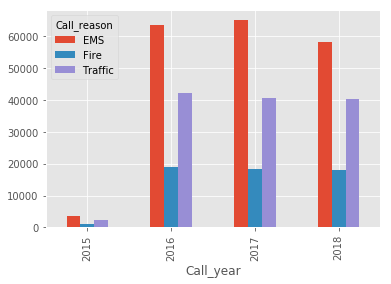

In [20]:
#unstack pivots a level of the row index (in this case the call reason ) to the column axis

df2.groupby(['Call_year','Call_reason']).count()['Count'].unstack().plot.bar(stacked=False)

# Plot a line graph of the Count of Call Reason by Year

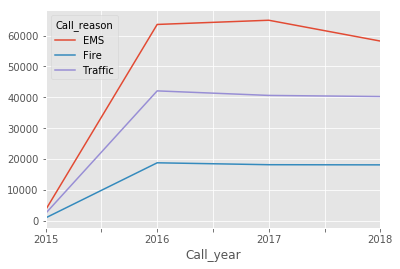

In [21]:
#Use unstack to plot the number of call of calls made each year for each call reason
#Sum or count both work

df2.groupby(['Call_year','Call_reason']).sum()['Count'].unstack().plot()

# Plot a bar graph of the Count of Call Reasons by Month

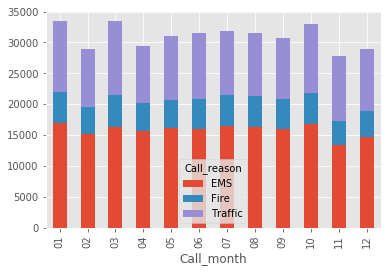

In [22]:
df2.groupby(['Call_month','Call_reason']).sum()['Count'].unstack().plot.bar(stacked=True)

# Plot a line graph of the Count of Call Reasons by Year

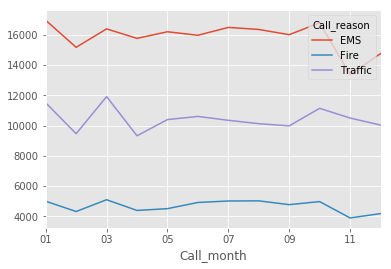

In [23]:
df2.groupby(['Call_month','Call_reason']).sum()['Count'].unstack().plot()

# Plot a bar graph of the Count of Call Reasons by Hour of Day

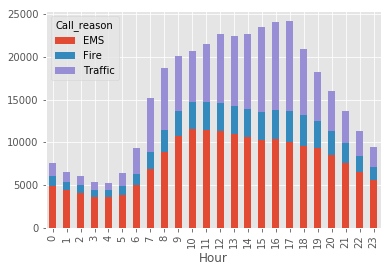

In [24]:
df2.groupby(['Hour','Call_reason']).sum()['Count'].unstack().plot.bar(stacked=True)

# Plot a line graph of the Count of Call Reasons by Hour of Day

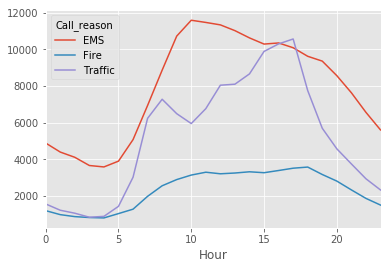

In [25]:
df2.groupby(['Hour','Call_reason']).sum()['Count'].unstack().plot()

# 5) What hour had the most calls?

In [26]:
#There are many 911 call occurrences in the afternoon from 12pm to 17 pm or 5 pm

df2['Hour'].value_counts().head() 

17    24178
16    24045
15    23453
14    22614
12    22598
Name: Hour, dtype: int64

# 6) What year had the most calls?

In [27]:
df2['Call_year'].value_counts().head()  # 2016 and 2017 had the highest number of calls. 2015 could be an outlier 

2016    124495
2017    123768
2018    116615
2015      6902
Name: Call_year, dtype: int64

# 7) What month had the most calls?

In [28]:
df2['Call_month'].value_counts().head()

01    33480
03    33416
10    32919
07    31863
08    31512
Name: Call_month, dtype: int64

# 8) Which call event was the most frequent?

In [29]:
df2['Call_event'].value_counts().head()

 VEHICLE ACCIDENT -       83269
 DISABLED VEHICLE -       24821
 FIRE ALARM               23073
 FALL VICTIM              20036
 RESPIRATORY EMERGENCY    20030
Name: Call_event, dtype: int64

# 9) Which call event was the most frequent?

In [30]:
df2['Call_event'].value_counts().tail()

 HIT + RUN                    1
 ANIMAL COMPLAINT             1
 HAZARDOUS ROAD CONDITIONS    1
 PRISONER IN CUSTODY          1
 POLICE INFORMATION           1
Name: Call_event, dtype: int64

# 10) Which call reason was the most frequent?

In [31]:
df2['Call_reason'].value_counts().head()

EMS        190315
Traffic    125374
Fire        56091
Name: Call_reason, dtype: int64

# Export the dataframe df2 as a CSV file to the PythonDS directory 

In [32]:
export_csv = df2.to_csv(r'C:\Users\LDiakite\Desktop\PythonDS\export_dataframe.csv', index = None, header=True)

print(df2)

              Date      Time  Zipcode           Township  Count Call_year  \
0       2015-12-10  17:10:52  19525.0        NEW HANOVER      1      2015   
1       2015-12-10  17:29:21  19446.0  HATFIELD TOWNSHIP      1      2015   
2       2015-12-10  14:39:21  19401.0         NORRISTOWN      1      2015   
3       2015-12-10  16:47:36  19401.0         NORRISTOWN      1      2015   
5       2015-12-10  15:39:04  19446.0           LANSDALE      1      2015   
6       2015-12-10  16:46:48  19044.0            HORSHAM      1      2015   
7       2015-12-10  16:17:05  19426.0           SKIPPACK      1      2015   
8       2015-12-10  16:51:42  19438.0      LOWER SALFORD      1      2015   
9       2015-12-10  17:35:41  19462.0           PLYMOUTH      1      2015   
11      2015-12-10  16:32:10  19428.0           PLYMOUTH      1      2015   
12      2015-12-10  17:15:49  19040.0     UPPER MORELAND      1      2015   
13      2015-12-10  17:12:47  19027.0         CHELTENHAM      1      2015   